# Proyek Analisis Data: Air Quality from Tiantian
- **Nama:** Michelle Alvera Lolang
- **Email:** michellemialo8@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/michellealvera

## Menentukan Pertanyaan Bisnis

- Bagaimana variasi tingkat PM2.5 sepanjang tahun?
- Apa hubungan antara kondisi cuaca dengan tingkat PM2.5?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np #untuk operasi matematika
import pandas as pd #untuk memproses data
import matplotlib.pyplot as plt #untuk visualisasi data
import seaborn as sns #untuk visualisasi data

import statsmodels.api as sm #untuk analisis data
from scipy.stats import f_oneway #untuk menguji hipotesis

sns.set_style("darkgrid")

## Data Wrangling

### Gathering Data

In [3]:
file_path = "/content/PRSA_Data_Tiantan_20130301-20170228.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**Insight:**
- Data mentahnya terdiri dari 18 kolom
- Data diupdate tiap jam
- Telah mengimpor semua library yang diperlukan

### Assessing Data

In [5]:
initial_assessment = df.head()
initial_columns = df.columns
initial_datatypes = df.dtypes

initial_assessment, initial_columns, initial_datatypes

(   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
 1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
 2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
 3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
 4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   
 
      PRES  DEWP  RAIN   wd  WSPM  station  
 0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
 1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
 2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
 3  1026.2 -25.5   0.0    N   4.9  Tiantan  
 4  1027.1 -24.5   0.0  NNW   3.2  Tiantan  ,
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 No           int64
 year         int64
 month        int64
 day          int64
 hour 

**Insight:**
- xxx
- xxx

### Cleaning Data

In [6]:
#Check Null Data
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


In [7]:
#Check Duplicate Data
df.duplicated().sum()

0

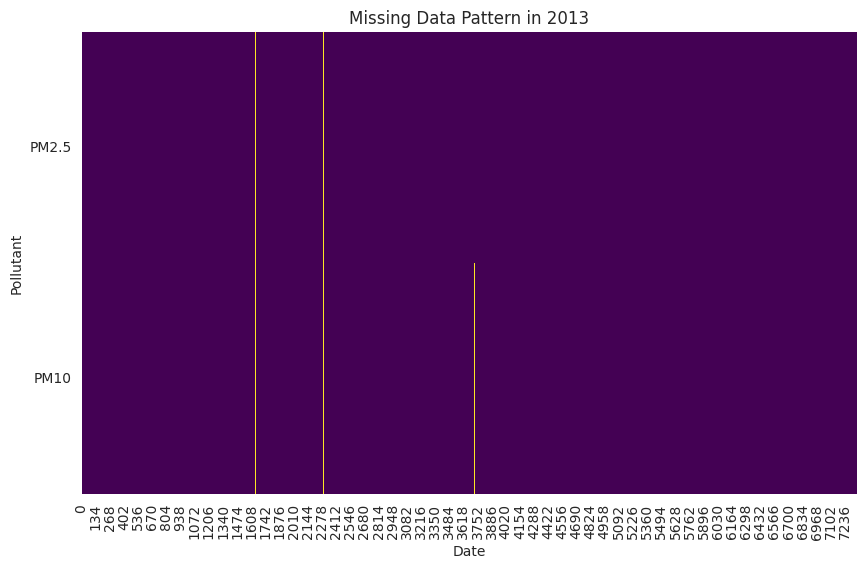

In [8]:
missing_percentage = df.isnull().mean() * 100
df_cols = ['PM2.5', 'PM10']
data_missing = df[df_cols].isnull()
data_missing['year'] = df['year']
data_missing_2013 = data_missing[data_missing['year'] == 2013]

plt.figure(figsize=(10, 6))
sns.heatmap(data_missing_2013.drop('year', axis=1).T, cmap='viridis', cbar=False)
plt.title('Missing Data Pattern in 2013')
plt.xlabel('Date')
plt.ylabel('Pollutant')
plt.yticks(rotation=0)
plt.show()

In [9]:
missing_percentage, data_missing_2013.sum()

(No         0.000000
 year       0.000000
 month      0.000000
 day        0.000000
 hour       0.000000
 PM2.5      1.930755
 PM10       1.702601
 SO2        3.188455
 NO2        2.121834
 CO         3.211271
 O3         2.404175
 TEMP       0.057039
 PRES       0.057039
 DEWP       0.057039
 RAIN       0.057039
 wd         0.222450
 WSPM       0.039927
 station    0.000000
 dtype: float64,
 PM2.5          17
 PM10           18
 year     14783472
 dtype: int64)

In [10]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,34986,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,NaN,1.280368,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


### Handling Missing Data

In [11]:
#use mean data to fill the missing values
df.fillna({'PM2.5': 82.16}, inplace=True)
df.fillna({'PM10': 106.36}, inplace=True)
df.fillna({'SO2': 14.37}, inplace=True)
df.fillna({'NO2': 53.16}, inplace=True)
df.fillna({'CO': 1298.3}, inplace=True)
df.fillna({'O3': 55.98}, inplace=True)
df.fillna({'TEMP': 13.67}, inplace=True)
df.fillna({'PRES': 1012.55}, inplace=True)
df.fillna({'DEWP': 2.45}, inplace=True)
df.fillna({'RAIN': 0.06}, inplace=True)
df.fillna({'WSPM': 1.86}, inplace=True)

#use top value or mode for wd
df.fillna({'wd': 'ENE'}, inplace=True)

**Insight:**
- Hanya sebagian kecil data yang hilang untuk polusi udara sehingga datasetnya cukup lengkap.
- Gunakan rata-rata untuk mengisi data numerik dan modus untuk data kategori.

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
df.groupby('year').mean(numeric_only=True)

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3672.5,7.500000,15.803922,11.5,83.197674,108.253061,18.183166,53.324052,1315.328159,54.439977,15.963657,1009.828758,5.152369,0.057979,1.803813
2014,11724.5,6.526027,15.720548,11.5,86.432895,114.227854,19.095107,55.616395,1314.141073,56.976402,13.881153,1012.534224,2.604429,0.054212,1.820046
2015,20484.5,6.526027,15.720548,11.5,82.600233,103.048874,11.883571,51.934587,1300.419395,60.070521,13.432386,1012.789625,2.692272,0.072879,1.934751
2016,29256.5,6.513661,15.756831,11.5,74.035310,97.231152,8.996379,50.082983,1199.436714,55.425442,13.863386,1012.824318,2.287096,0.079750,1.859347
2017,34356.5,1.474576,15.288136,11.5,98.140565,125.071017,14.021285,63.845819,1712.240113,36.041271,0.775002,1023.513159,-13.070304,0.003573,1.959619


In [13]:
df.groupby('month').mean(numeric_only=True)

,No,year,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,,,,,
1,20862.500000,2015.500000,16.000000,11.5,98.300323,119.430161,27.190837,67.953945,1895.806485,26.219603,-1.719817,1024.026865,-14.550538,0.000578,1.917836
2,21612.287611,2015.504425,14.628319,11.5,87.166018,104.936165,23.779491,53.433496,1368.965634,42.943805,1.216895,1022.169500,-13.081176,0.011895,2.095487
3,13518.500000,2014.500000,16.000000,11.5,94.347016,127.210081,26.396582,60.367656,1347.168112,52.676930,8.439468,1015.861229,-7.993952,0.007661,2.076613
4,14250.500000,2014.500000,15.500000,11.5,71.114042,109.540521,14.409327,46.741179,895.090069,72.175468,15.439931,1010.158681,0.164028,0.025625,2.346667
5,14982.500000,2014.500000,16.000000,11.5,62.615437,108.037520,15.195410,41.888669,882.857090,92.110705,21.709039,1004.202688,6.716499,0.045094,2.283132
6,15714.500000,2014.500000,15.500000,11.5,74.311250,94.756028,9.318872,41.995243,1108.686424,90.901819,24.700243,1001.104132,15.532882,0.129028,1.721632
7,16446.500000,2014.500000,16.000000,11.5,74.518078,88.104973,6.046172,38.565547,997.437332,91.373231,27.438340,999.877050,19.801411,0.262466,1.644086
8,17190.500000,2014.500000,16.000000,11.5,57.233757,72.224442,5.276590,39.496603,908.523992,84.923758,26.916801,1002.975168,18.908636,0.087870,1.579839
9,17922.500000,2014.500000,15.500000,11.5,63.920819,80.837222,7.092555,50.980648,1041.512743,52.171135,20.996468,1010.481233,13.908281,0.132160,1.513229


In [14]:
df.groupby('day').mean(numeric_only=True)

,No,year,month,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
day,,,,,,,,,,,,,,,
1,17198.500000,2014.666667,6.500000,11.5,88.542014,111.728576,12.763218,52.208017,1334.311979,53.691429,13.501736,1011.940625,2.664757,0.140017,1.870920
2,17222.500000,2014.666667,6.500000,11.5,77.189618,96.262691,14.093290,53.908698,1303.968490,51.710374,13.560206,1011.211545,2.260330,0.085243,1.822309
3,17246.500000,2014.666667,6.500000,11.5,86.715069,113.956042,15.505677,54.457847,1417.389062,57.338441,14.056076,1011.217361,1.806684,0.000955,1.964410
4,17270.500000,2014.666667,6.500000,11.5,93.991979,118.757170,13.707231,55.651424,1484.468056,57.202826,13.610301,1011.521788,2.336719,0.081510,1.904340
5,17294.500000,2014.666667,6.500000,11.5,77.611285,101.497500,13.484852,49.543021,1271.392969,61.377765,13.889323,1012.653501,2.414410,0.037587,1.942448
6,17318.500000,2014.666667,6.500000,11.5,88.497569,106.327500,16.004291,52.349662,1381.369705,59.430626,13.458030,1013.310460,2.216319,0.065451,1.750521
7,17342.500000,2014.666667,6.500000,11.5,86.926667,104.131250,14.884028,51.270139,1397.080122,58.512993,13.539612,1013.136169,2.971441,0.125868,1.809115
8,17366.500000,2014.666667,6.500000,11.5,83.620243,105.014271,15.777716,49.922261,1254.363542,58.046959,13.314980,1013.256163,1.829253,0.046007,1.978385
9,17390.500000,2014.666667,6.500000,11.5,71.699063,96.820000,12.735860,50.911823,1136.324740,53.607566,12.743490,1013.629138,1.509896,0.034115,1.999219


In [15]:
df.groupby('hour').mean(numeric_only=True)

,No,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,,,,,
0,17521.0,2014.66256,6.52293,15.729637,88.909596,114.904148,11.780616,58.648724,1425.824983,37.605251,11.609708,1012.964294,3.180185,0.080123,1.503217
1,17522.0,2014.66256,6.52293,15.729637,88.548569,112.852430,11.922372,57.359613,1416.378919,34.568454,11.148593,1012.911225,3.289185,0.062081,1.445243
2,17523.0,2014.66256,6.52293,15.729637,88.090965,108.648077,10.875375,55.255749,1403.154073,32.019752,10.667154,1012.852578,3.263929,0.082615,1.390486
3,17524.0,2014.66256,6.52293,15.729637,86.821287,105.146968,10.726951,53.989812,1364.951540,30.780816,10.231963,1012.768925,3.200650,0.108665,1.342752
4,17525.0,2014.66256,6.52293,15.729637,84.417331,101.549418,10.477207,52.696549,1370.443806,28.277065,9.879678,1012.750240,3.079090,0.088063,1.310308
5,17526.0,2014.66256,6.52293,15.729637,81.732170,97.331034,10.017331,50.833357,1353.458658,25.290110,9.626707,1012.923819,2.976352,0.057331,1.327214
6,17527.0,2014.66256,6.52293,15.729637,79.209281,96.395797,10.096736,51.416570,1352.111773,23.245029,9.825505,1013.180116,2.941650,0.041862,1.388679
7,17528.0,2014.66256,6.52293,15.729637,77.785202,97.151472,10.684573,55.030545,1382.350650,21.887763,10.681008,1013.504803,2.859480,0.029925,1.528693
8,17529.0,2014.66256,6.52293,15.729637,79.176126,102.271458,12.736657,60.064013,1431.959343,24.031411,11.969423,1013.829637,2.680356,0.035264,1.682683


In [16]:
correlation_matrix = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.889791,0.392483,0.654249,0.786023,-0.165976,-0.150038,0.007196,0.111243,-0.014904,-0.287640
PM10,0.889791,1.000000,0.387506,0.617446,0.706908,-0.116944,-0.118927,-0.022081,0.058490,-0.027643,-0.178408
SO2,0.392483,0.387506,1.000000,0.406193,0.398966,-0.047649,-0.219085,0.151273,-0.218151,-0.038159,-0.038440
NO2,0.654249,0.617446,0.406193,1.000000,0.700122,-0.535742,-0.316918,0.180636,-0.078946,-0.047178,-0.407930
CO,0.786023,0.706908,0.398966,0.700122,1.000000,-0.313718,-0.313296,0.148633,-0.034349,-0.013440,-0.321367
O3,-0.165976,-0.116944,-0.047649,-0.535742,-0.313718,1.000000,0.571942,-0.423134,0.273311,0.018230,0.330393
TEMP,-0.150038,-0.118927,-0.219085,-0.316918,-0.313296,0.571942,1.000000,-0.837480,0.819070,0.038660,0.048829
PRES,0.007196,-0.022081,0.151273,0.180636,0.148633,-0.423134,-0.837480,1.000000,-0.770305,-0.065779,0.038493
DEWP,0.111243,0.058490,-0.218151,-0.078946,-0.034349,0.273311,0.819070,-0.770305,1.000000,0.089356,-0.278895
RAIN,-0.014904,-0.027643,-0.038159,-0.047178,-0.013440,0.018230,0.038660,-0.065779,0.089356,1.000000,0.025547


**Insight:**
- Terdapat korelasi positif yang kuat antara PM2.5 dan NO2 serta PM2.5 dan CO.
- Korelasi negative antara O3 dan pressure.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren polusi udara di Tiantian tiap tahunnya?

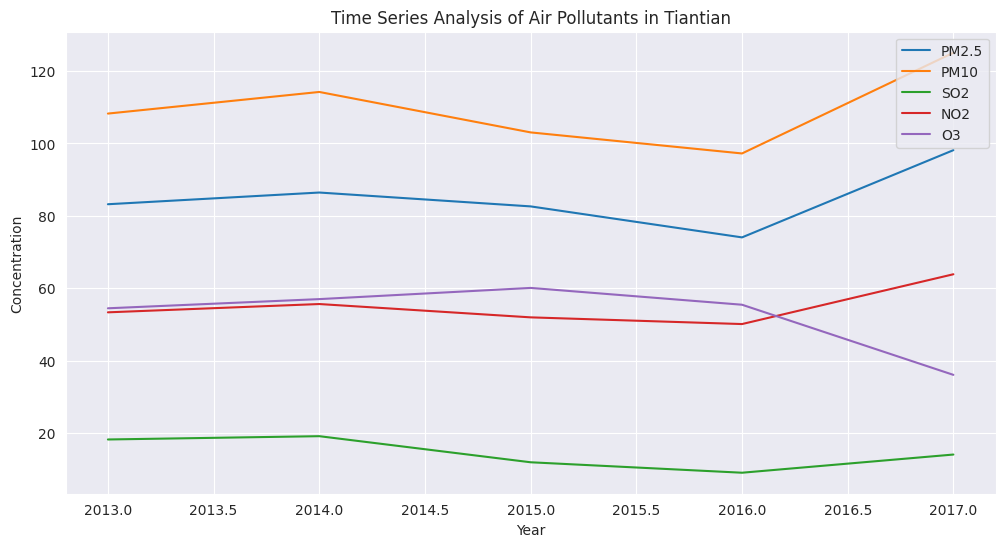

In [17]:
df_time_series = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].groupby(df['year']).mean(numeric_only=True)

plt.figure(figsize=(12, 6))
plt.plot(df_time_series.index, df_time_series['PM2.5'], label='PM2.5')
plt.plot(df_time_series.index, df_time_series['PM10'], label='PM10')
plt.plot(df_time_series.index, df_time_series['SO2'], label='SO2')
plt.plot(df_time_series.index, df_time_series['NO2'], label='NO2')
plt.plot(df_time_series.index, df_time_series['O3'], label='O3')
plt.title('Time Series Analysis of Air Pollutants in Tiantian')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.legend()
plt.show()

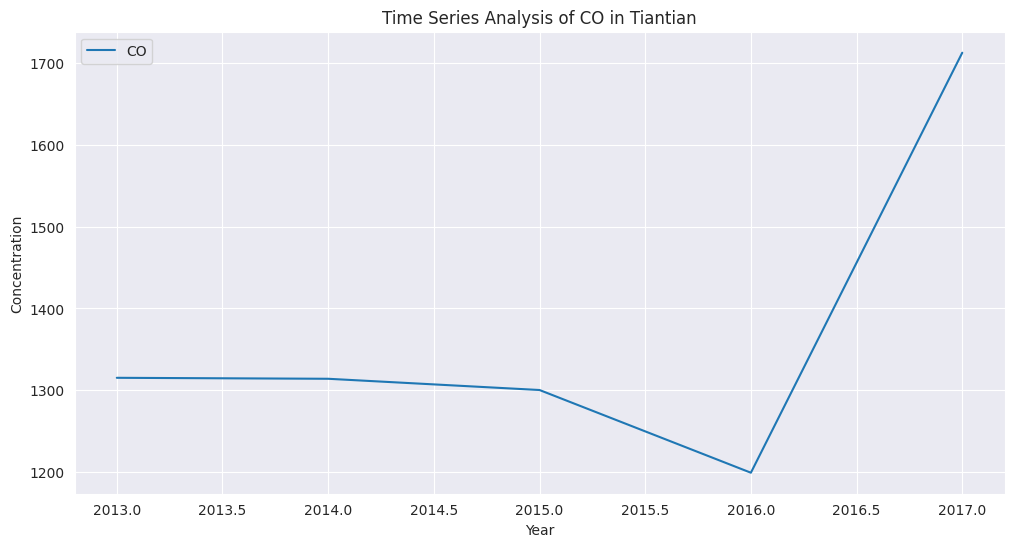

In [18]:
#since CO is too high, separate and make its own chart
plt.figure(figsize=(12, 6))
plt.plot(df_time_series.index, df_time_series['CO'], label='CO')
plt.title('Time Series Analysis of CO in Tiantian')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.legend()
plt.show()

**Insight:**
- Konsentrasi PM2.5, PM10, dan NO2 naik cukup signifikan dari tahun 2016
- Terdapat lonjakan konsentrasi CO dari tahun 2016
- Konsentrasi O3 turun cukup signifikan dari tahun 2016
- Hanya SO2 yang cukup stabil

### Pertanyaan 2: Apa hubungan antara kondisi cuaca dengan PM2.5?

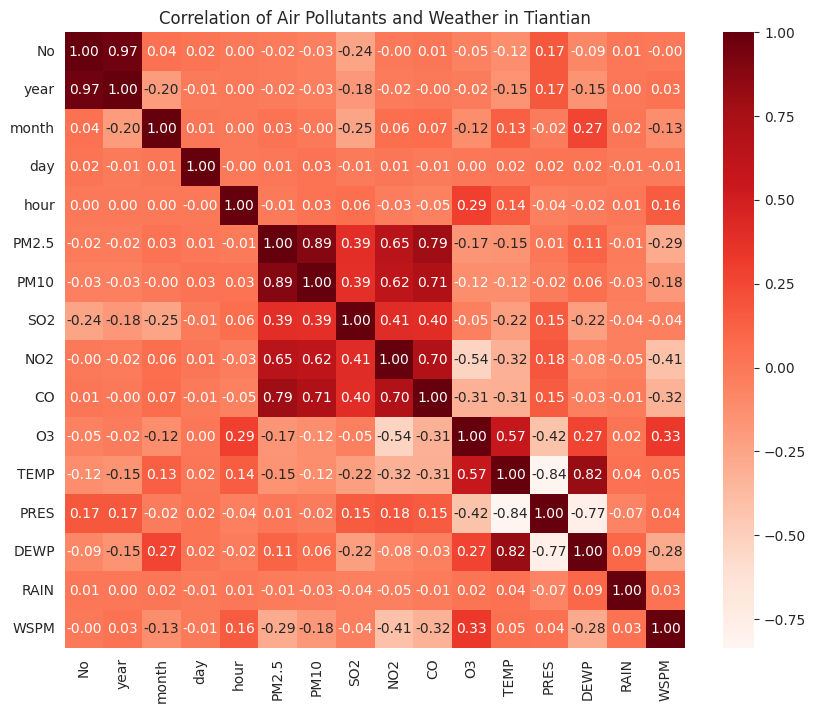

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.title('Correlation of Air Pollutants and Weather in Tiantian')
plt.show()

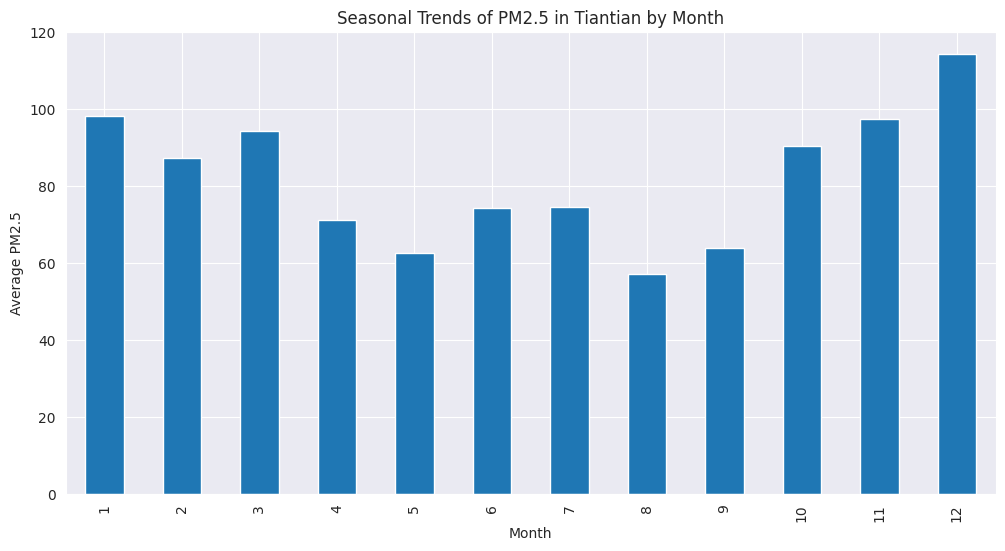

ANOVA Test Result: F_onewayResult(statistic=43.46015924936918, pvalue=1.9330017619346577e-36)
Seasonal Trends: month
1      98.300323
2      87.166018
3      94.347016
4      71.114042
5      62.615437
6      74.311250
7      74.518078
8      57.233757
9      63.920819
10     90.396519
11     97.497806
12    114.296667
Name: PM2.5, dtype: float64
Correlation with Weather Conditions: 
 TEMP    -0.150038
PRES     0.007196
DEWP     0.111243
RAIN    -0.014904
PM2.5    1.000000
Name: PM2.5, dtype: float64


In [20]:
groups = df.groupby('year')['PM2.5']
anova_test = [group[1] for group in groups]
anova_test_result = f_oneway(*anova_test)

seasonal_trends = df.groupby(['month'])['PM2.5'].mean()
weather_corr = df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']].corr()['PM2.5']

plt.figure(figsize=(12, 6))
seasonal_trends.plot(kind='bar', title='Seasonal Trends of PM2.5 in Tiantian by Month')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.show()

print("ANOVA Test Result:", anova_test_result)
print("Seasonal Trends:", seasonal_trends)
print("Correlation with Weather Conditions: \n", weather_corr)

**Insight:**
- Rata-rata PM2.5 tidak sama tiap tahunnya
- Konsentrasi PM2.5 lebih tinggi di bulan November hingga Januari
- Korelasi negatif antara PM2.5 dengan TEMP
- Korelasi positive antara PM2.5 dengan DEWP
- Tidak ada korelasi yang kuat antara PM2.5 dengan PRES serta PM2.5 dengan RAIN.

## Analisis Lanjutan (Opsional)

## Conclusion

### Conclusion pertanyaan 1
Kualitas udara di Tiantian mengalami penurunan secara umum sejak tahun 2016. Terdapat kenaikan signifikan pada konsentrasi PM2.5, PM10, dan NO2 serta lonjakan konsentrasi CO sejak tahun 2016. Sementara konsentrasi O3 justru mengalami penurunan signifikan dan hanya konsentrasi SO2 yang cukup stabil.

### Conclusion pertanyaan 2
Data menunjukkan bahwa rata-rata konsentrasi PM2.5 bervariasi setiap tahunnya karena adanya faktor-faktor yang memengaruhi tingkat polusi per tahun. Terdapat pola musiman yaitu konsentrasi PM2.5 yang lebih tinggi mulai bulan November hingga Januari. Konsentrasi PM2.5 cenderung lebih tinggi saat suhu udara lebih rendah dan lebih lembap.